In [38]:
from mlflow.tracking.client import MlflowClient
from mlflow.entities import ViewType
import mlflow
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
mlflow_settings = dict(
    username="mlflow",
    password="mlflow",
    host="127.0.0.1",
    port=5000,
)

mlflow.set_tracking_uri(
    "http://{username}:{password}@{host}:{port}".format(**mlflow_settings)
)
experiment_id = "1" # your experiment id

In [40]:
df = mlflow.search_runs(
    experiment_ids=1,
)

In [41]:
df = df[df['tags.mlflow.runName'].str.contains('traffic_prediction') & ~pd.isnull(df['metrics.MSE'])]
df.head(10)

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.MSE,params.Features,params.Date,params.Model,tags.mlflow.user,tags.mlflow.parentRunId,tags.mlflow.source.type,tags.mlflow.runName,tags.mlflow.source.name,tags.mlflow.source.git.commit
0,f632ceaab7824fc9bda8f052414e6b00,1,FINISHED,/tmp/mlruns/1/f632ceaab7824fc9bda8f052414e6b00...,2021-02-10 18:47:58.046000+00:00,2021-02-10 18:48:06.447000+00:00,2.155295e+08,"['weekday', 'year', 'month', 'day']",2021-02-16 15:47:56.744966,LGBMClassifier,arusi,65402cf13619432ca1308e05d57b37ff,LOCAL,traffic_prediction_LGBMClassifier_2021-02-16 1...,mlflow_handy.py,None
1,69df966fe88246238a9a7f262c2217fa,1,FINISHED,/tmp/mlruns/1/69df966fe88246238a9a7f262c2217fa...,2021-02-10 18:47:57.543000+00:00,2021-02-10 18:47:58.036000+00:00,2.177586e+08,"['weekday', 'year', 'month', 'day']",2021-02-16 15:47:56.744966,RandomForestRegressor,arusi,65402cf13619432ca1308e05d57b37ff,LOCAL,traffic_prediction_RandomForestRegressor_2021-...,mlflow_handy.py,None
2,b3ae5d985a6d4f7c9f775665439948a0,1,FINISHED,/tmp/mlruns/1/b3ae5d985a6d4f7c9f775665439948a0...,2021-02-10 18:47:57.121000+00:00,2021-02-10 18:47:57.531000+00:00,2.179333e+08,"['weekday', 'year', 'month', 'day']",2021-02-16 15:47:56.744966,XGBRegressor,arusi,65402cf13619432ca1308e05d57b37ff,LOCAL,traffic_prediction_XGBRegressor_2021-02-16 15:...,mlflow_handy.py,None
3,81f1e304a3424a0c8a91da2295d18d20,1,FINISHED,/tmp/mlruns/1/81f1e304a3424a0c8a91da2295d18d20...,2021-02-10 18:47:56.768000+00:00,2021-02-10 18:47:57.109000+00:00,2.211378e+08,"['weekday', 'year', 'month', 'day']",2021-02-16 15:47:56.744966,LinearRegression,arusi,65402cf13619432ca1308e05d57b37ff,LOCAL,traffic_prediction_LinearRegression_2021-02-16...,mlflow_handy.py,None
5,378165a315134e3d9116033b618e3c42,1,FINISHED,/tmp/mlruns/1/378165a315134e3d9116033b618e3c42...,2021-02-10 18:47:48.481000+00:00,2021-02-10 18:47:56.622000+00:00,1.499810e+06,"['weekday', 'year', 'month', 'day']",2021-02-15 15:47:47.069920,LGBMClassifier,arusi,870f4f49b9534e76b792a43008a82390,LOCAL,traffic_prediction_LGBMClassifier_2021-02-15 1...,mlflow_handy.py,None
6,fbf0e48d4cb7431c8f8c3262a2f6ee1c,1,FINISHED,/tmp/mlruns/1/fbf0e48d4cb7431c8f8c3262a2f6ee1c...,2021-02-10 18:47:47.945000+00:00,2021-02-10 18:47:48.466000+00:00,1.875727e+07,"['weekday', 'year', 'month', 'day']",2021-02-15 15:47:47.069920,RandomForestRegressor,arusi,870f4f49b9534e76b792a43008a82390,LOCAL,traffic_prediction_RandomForestRegressor_2021-...,mlflow_handy.py,None
7,2e0cbd5bc11f4d2ebcb6303681d10a1a,1,FINISHED,/tmp/mlruns/1/2e0cbd5bc11f4d2ebcb6303681d10a1a...,2021-02-10 18:47:47.536000+00:00,2021-02-10 18:47:47.934000+00:00,2.218602e+08,"['weekday', 'year', 'month', 'day']",2021-02-15 15:47:47.069920,XGBRegressor,arusi,870f4f49b9534e76b792a43008a82390,LOCAL,traffic_prediction_XGBRegressor_2021-02-15 15:...,mlflow_handy.py,None
8,bec9604f24a04d68bf0c7b14ab5053e9,1,FINISHED,/tmp/mlruns/1/bec9604f24a04d68bf0c7b14ab5053e9...,2021-02-10 18:47:47.179000+00:00,2021-02-10 18:47:47.525000+00:00,1.224483e+06,"['weekday', 'year', 'month', 'day']",2021-02-15 15:47:47.069920,LinearRegression,arusi,870f4f49b9534e76b792a43008a82390,LOCAL,traffic_prediction_LinearRegression_2021-02-15...,mlflow_handy.py,None
10,a8cebfd3c06445aeaa20e36fb3336856,1,FINISHED,/tmp/mlruns/1/a8cebfd3c06445aeaa20e36fb3336856...,2021-02-10 18:47:35.038000+00:00,2021-02-10 18:47:46.936000+00:00,3.745345e+06,"['weekday', 'year', 'month', 'day']",2021-02-14 15:47:33.532130,LGBMClassifier,arusi,59fa1498e1a74b709f16229d95521cd6,LOCAL,traffic_prediction_LGBMClassifier_2021-02-14 1...,mlflow_handy.py,None
11,73f1b61727af479bb313b4f6425e4523,1,FINISHED,/tmp/mlruns/1/73f1b61727af479bb313b4f6425e4523...,2021-02-10 18:47:34.550000+00:00,2021-02-10 18:47:35.027000+00:00,3.039986e+07,"['weekday', 'year', 'month', 'day']",2021-02-14 15:47:33.532130,RandomForestRegressor,arusi,59fa1498e1a74b709f16229d95521cd6,LOCAL,traffic_prediction_RandomForestRegressor_2021-...,mlflow_handy.py,None


In [43]:
df = df.groupby(["params.Model","params.Date"]).mean().reset_index()

In [45]:
df.head(10)

,params.Model,params.Date,metrics.MSE
0,LGBMClassifier,2021-02-10 15:46:39.140268,1.492145e+06
1,LGBMClassifier,2021-02-11 15:46:52.917962,2.303457e+08
2,LGBMClassifier,2021-02-12 15:47:01.370794,2.311626e+08
3,LGBMClassifier,2021-02-13 15:47:13.731359,3.941407e+06
4,LGBMClassifier,2021-02-14 15:47:33.532130,3.745345e+06
5,LGBMClassifier,2021-02-15 15:47:47.069920,1.499810e+06
6,LGBMClassifier,2021-02-16 15:47:56.744966,2.155295e+08
7,LinearRegression,2021-02-10 15:46:39.140268,1.366322e+06
8,LinearRegression,2021-02-11 15:46:52.917962,2.241669e+08
9,LinearRegression,2021-02-12 15:47:01.370794,2.239838e+08


In [47]:
df['Date'] = pd.to_datetime(df['params.Date']).dt.strftime('%Y-%m-%d')

[Text(0, 0.5, 'MSE'), Text(0.5, 1.0, 'MSE in runs')]

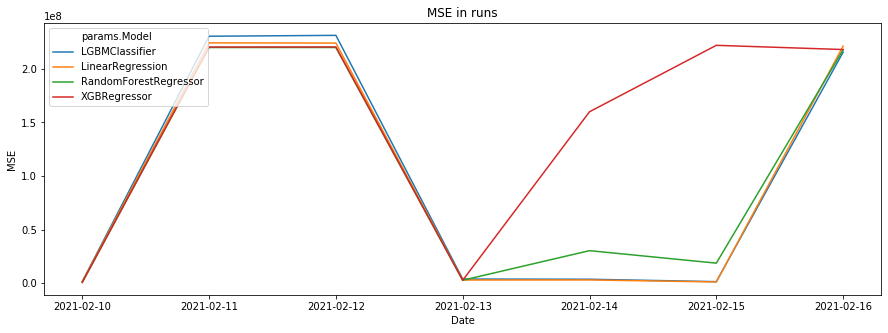

In [54]:
fig, ax = plt.subplots(figsize=(15,5))
sns.lineplot(x="Date", y="metrics.MSE", hue="params.Model", ax=ax, data=df)
ax.legend(loc='upper left')
ax.set(title='MSE in runs', ylabel='MSE')